Now let's try the example we mentioned during the lecture. 

The training data contain some example measurements of the profit gained by opening an outlet in the cities with the population ranging between 30,000 and 100,000. The y-values are the profit measured in USD, and the x-values are the populations of the city. Each city population and profit tuple constitutes one training example in training dataset.

x = [6.4862, 5.5277, 8.5186, 7.0032]

y = [6.5987, 9.1302, 13.662, 11.854]

In [5]:
import numpy as np
# initialize parameters
b = 0
m = 0

# set learning rate
learning_rate = 0.01

# set number of iterations
num_iterations = 5

# define dataset
x = np.array([6.4862, 5.5277, 8.5186, 7.0032])
y = np.array([6.5987, 9.1302, 13.662, 11.854])

# perform gradient descent
for i in range(num_iterations):
    y_pred = m*x + b
    D_m = (-1/len(x)) * sum(x * (y - y_pred))
    D_b = (-1/len(x)) * sum(y - y_pred)
    m = m - learning_rate * D_m
    b = b - learning_rate * D_b
    J = 0.5/len(x)*sum(np.power(m*x + b - y, 2))
    print("Iteration: {}, m: {}, b: {}, J: {}".format(i, m, b, J))

Iteration: 0, m: 0.7316663512, b: 0.10311225, J: 15.684545838430298
Iteration: 1, m: 1.100941716819294, b: 0.15482601463315543, J: 5.224366206500796
Iteration: 2, m: 1.287339230914015, b: 0.18060200240727128, J: 2.560504060171378
Iteration: 3, m: 1.3814488243917513, b: 0.19328876523150096, J: 1.8820826037771419
Iteration: 4, m: 1.4289860134191454, b: 0.1993702265946761, J: 1.7092812466388776


In [1]:
%matplotlib inline
# sets the backend of matplotlib to the 'inline' backend

mean squared error:  0.1137413769325341
R2 score:  0.8565656779573378


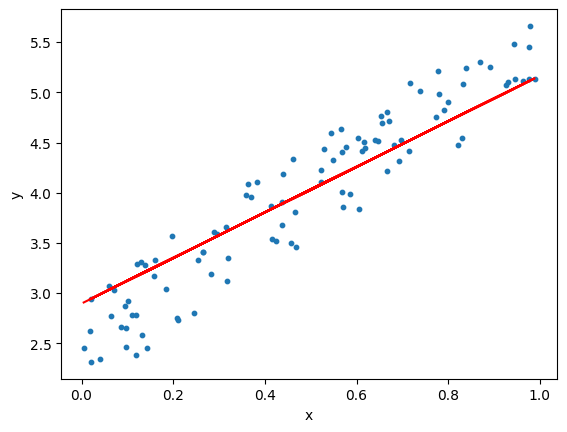

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

class LinearRegressionUsingGD:
    """Linear Regression Using Gradient Descent.
    Parameters
    ----------
    eta : float
        Learning rate
    n_iterations : int
        No of passes over the training set
    Attributes
    ----------
    w_ : weights/ after fitting the model
    bias_ : bias / after fitting the model
    cost_ : total error of the model after each iteration
    """

    def __init__(self, eta=0.05, n_iterations=10000):
        self.eta = eta
        self.n_iterations = n_iterations

    def fit(self, x, y):
        """Fit the training data
        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Training samples
        y : array-like, shape = [n_samples, n_target_values]
            Target values
        Returns
        -------
        self : object
        """

        self.cost_ = []
        self.w_ = np.zeros((x.shape[1], 1))
        self.bias_ = np.zeros((1, 1))
        m = x.shape[0]

        for _ in range(self.n_iterations):
            y_pred = np.dot(x, self.w_) + self.bias_
            residuals = y_pred - y
            gradient_vector_weight = np.dot(x.T, residuals)
            gradient_vector_bias = np.sum(residuals) 
            self.w_ -= (self.eta / m) * gradient_vector_weight
            self.bias_ -= (self.eta / m) * gradient_vector_bias
            cost = np.sum((residuals ** 2)) / (2 * m)
            self.cost_.append(cost)
        return self

    def predict(self, x):
        """ Predicts the value after the model has been trained.
        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Test samples
        Returns
        -------
        Predicted value
        """
        return np.dot(x, self.w_) + self.bias_
    
    
def run():
    # generate random data-set
    np.random.seed(0)
    x = np.random.rand(100, 1)
    y = 2 + 3 * x + np.random.rand(100, 1)
    
    # Model Initialization
    model = LinearRegressionUsingGD(0.02,500)
    # Fit the data (train the model)
    model.fit(x, y)
    #model = LinearRegression().fit(x, y)
    
    # Predict
    y_pred = model.predict(x)
    #print('predicted response:', y_pred, sep='\n')
    
    
    # model evaluation
    rmse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print('mean squared error: ', rmse)
    print('R2 score: ', r2)
    
    # plot
    plt.scatter(x,y,s=10)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(x, y_pred, color='r')
    plt.show()
    
    
if __name__ == '__main__':
    model = LinearRegressionUsingGD()
    run()


# Linear Regression based on sklearn
The example below uses only the first feature of the `diabetes` dataset,
in order to illustrate the data points within the two-dimensional plot.
The straight line can be seen in the plot, showing how linear regression
attempts to draw a straight line that will best minimize the
residual sum of squares between the observed responses in the dataset,
and the responses predicted by the linear approximation.

The coefficients, residual sum of squares and the coefficient of
determination are also calculated.


Automatically created module for IPython interactive environment
Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


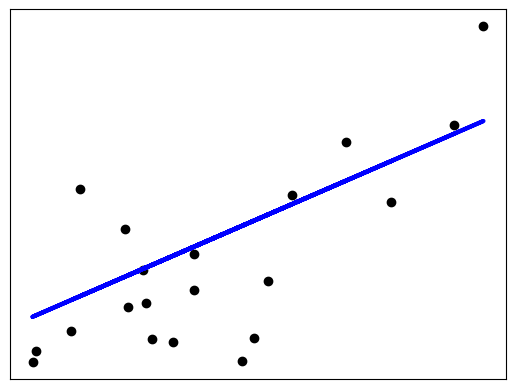

In [8]:
print(__doc__)
# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]
# Split the data into training/test sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/test sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]


# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [8]:
import numpy as np
#np.random.seed(0)
print(np.random.rand(10, 1))

[[0.97861834]
 [0.79915856]
 [0.46147936]
 [0.78052918]
 [0.11827443]
 [0.63992102]
 [0.14335329]
 [0.94466892]
 [0.52184832]
 [0.41466194]]


In [6]:
import numpy as np
np.random.seed(0)
print(np.random.rand(10, 1))

[[0.5488135 ]
 [0.71518937]
 [0.60276338]
 [0.54488318]
 [0.4236548 ]
 [0.64589411]
 [0.43758721]
 [0.891773  ]
 [0.96366276]
 [0.38344152]]
